In [1]:
import pandas as pd
import matplotlib as mpl
from collections import Counter
import matplotlib.pyplot  as plt
import numpy as np

In [30]:
local_file="movie_title_ratings.csv"
source=local_file
df = pd.read_csv(source)
df.head()

/Users/amjad/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.4,58
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport",5.2,236
2,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama",6.1,31
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama",6.4,413
4,tt0000584,movie,El ciego de la aldea,El ciego de la aldea,0,1907,\N,75,Drama,4.8,35


In [31]:
df.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult             int64
startYear          object
endYear            object
runtimeMinutes     object
genres             object
averageRating     float64
numVotes            int64
dtype: object

In [161]:
df2= df.loc[:,('tconst','genres','averageRating', 'numVotes')]

In [162]:
df2.head()

,tconst,genres,averageRating,numVotes
0,tt0000009,Romance,5.4,58
1,tt0000147,"Documentary,News,Sport",5.2,236
2,tt0000335,"Biography,Drama",6.1,31
3,tt0000574,"Biography,Crime,Drama",6.4,413
4,tt0000584,Drama,4.8,35


In [163]:
# covert genre to list
df2.genres=df2.genres.apply(lambda x : x.split(','))

In [164]:
df2.head()

,tconst,genres,averageRating,numVotes
0,tt0000009,[Romance],5.4,58
1,tt0000147,"[Documentary, News, Sport]",5.2,236
2,tt0000335,"[Biography, Drama]",6.1,31
3,tt0000574,"[Biography, Crime, Drama]",6.4,413
4,tt0000584,[Drama],4.8,35


In [165]:
# Extract a list of unique values from the genres column
genres_iter = (set(g) for g in df2.genres)
genres = sorted(set.union(*genres_iter))
# genres

In [166]:
#convert genres to dummy variables
df2=df2[['tconst','averageRating','numVotes']].join(df2.genres.str.join('|').str.get_dummies())
df2.head()

,tconst,averageRating,numVotes,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0000009,5.4,58,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,tt0000147,5.2,236,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,tt0000335,6.1,31,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0000574,6.4,413,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,tt0000584,4.8,35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
df2.loc[df2.Action==1].averageRating.median()

5.9

In [133]:
# compute AVG Rating for each genre
genreAvgRating={}
for genre in genres:
    genreAvgRating[genre]=df2.loc[df2[genre]==1].averageRating.mean()


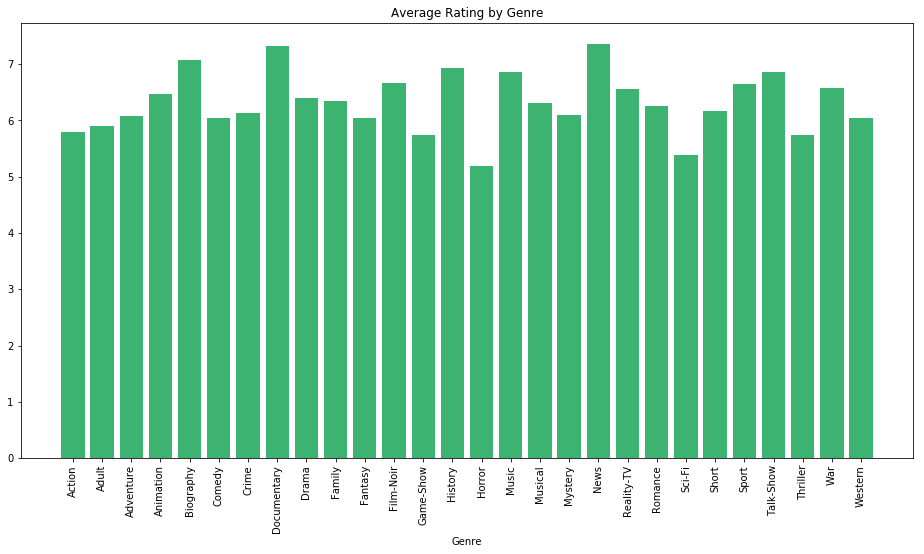

In [149]:
plt.figure(figsize = (16, 8))
plt.bar(range(len(genreAvgRating)), genreAvgRating.values(), align='center',color='mediumseagreen')
plt.xticks(range(len(genreAvgRating)), genreAvgRating.keys(),rotation='vertical')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.show()

In [141]:
# compute median(Rating) for each genre
genreQ2Rating={}
for genre in genres:
    genreQ2Rating[genre]=df2.loc[df2[genre]==1].averageRating.median()

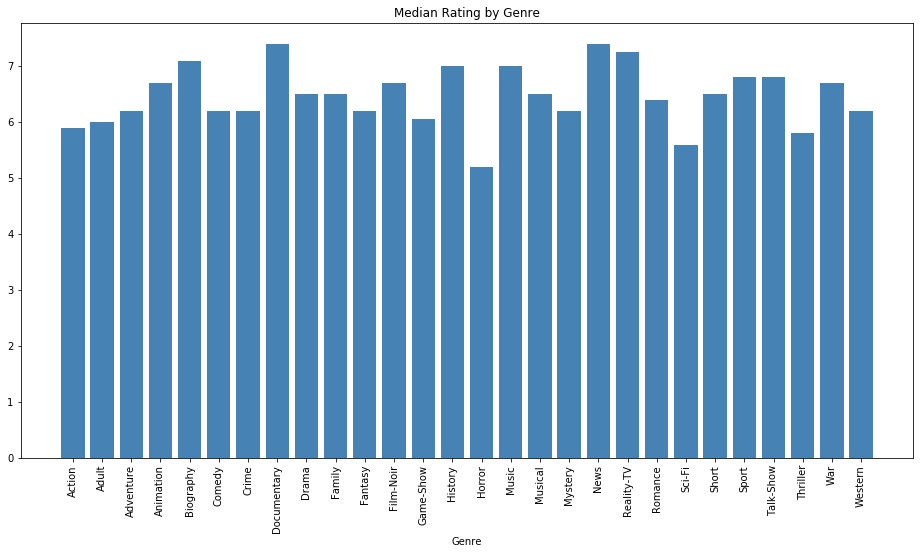

In [152]:
plt.figure(figsize = (16, 8))
plt.bar(range(len(genreQ2Rating)), genreQ2Rating.values(), align='center', color='steelblue')
plt.xticks(range(len(genreQ2Rating)), genreQ2Rating.keys(),rotation='vertical')
plt.title('Median Rating by Genre')
plt.xlabel('Genre')
plt.show()

In [ ]:
plt